## This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

19 house features plus the price and the id columns, along with 21613 observations.

Column Info –

1. id - a notation for a house
2. date -Date house was sold
3. price- Price is prediction target
4. bedrooms- Number of Bedrooms/House
5. bathrooms- Number of bathrooms/bedrooms
6. sqft_living- square footage of the home
7. sqft_lot- square footage of the lot
8. floors-Total floors (levels) in house
9. waterfront- House which has a view to a waterfront
10. view-Has been viewed
11. condition-How good the condition is ( Overall )
12. grade-overall grade given to the housing unit, based on King County grading system
13. sqft_above-square footage of house apart from basement
14. sqft_basement-square footage of the basement
15. yr_built-Built Year
16. yr_renovated-Year when house was renovated
17. zipcode-zip
18. lat-Latitude coordinate
19. long-Longitude coordinate
20. sqft_living15-Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area-
21. sqft_lot15 -lotSize area in 2015(implies-- some renovations)
 

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
# Load libraries
import numpy as np 
from numpy import arange
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

## 1. Import libraries and read the dataset.

In [4]:
house = pd.read_csv("kc_house_data.csv")
house.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0           0     0     ...          7        1180   
1      7242     2.0           0     0     ...          7        2170   
2     10000     1.0           0     0     ...          6         770   
3      5000     1.0           0     0     ...          7        1050   
4      8080     1.0           0     0     ...          8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [6]:
house.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

## Observation

### 1.  Predicting the price of the house based the given feature is the primary goal.
### 2.  It has 19 cloumns with Id and Target variabel Price.
### 3. Sice we have to predict a price value this falls under a regression problem.
### 4. All the features are numerical except for date which needs to be a datetime datatype but its an object, which will be converted.
### 5. We can see that there are no missing values in the dataset from info, since the no of rows of all columns are same. 
### 6. Date attribute just gives the date on which the house of sold. We can convert it to find the age of the house whihc will become a useful feature for predicting the house price. 
### 7. Water front is a catagorical variable which has the value 0 and 1 even though it is an integer.
### 8 . View attribute does not give us a clear meaning it is not clear whether its how many times the property has been viewed or whether the property has a view. This attribute can be removed incase it dosent make much sense.
### 9 . Grade and Conditon are Ordinal data.
### 10. bedroom seems to have a minimum value of 0 and Maximum value of 33. This record needs to be verified for anomaly and should be removed incase its an error.
### 11. need to perform univariate analysis on Sqft_living since it has high std deviation.
### 12. Id attribute can be removed since its an index value.
### 13.  Sqft_living15 an sqft_lot15 means living sqft and value is subject to change since they have undergone  renovations 
### 14. Sqft_living and Sqft_living15 can be combined to make a better feature, same way sqft_lot should also be combined.
### 15. 

## 2. Explore Data Analysis. Find out how one variable related to other and distributions of data.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


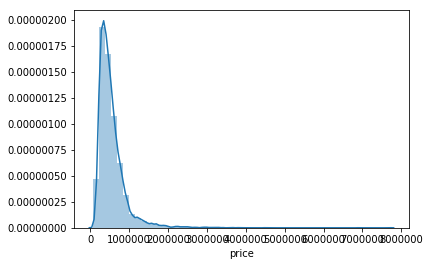

In [7]:
# lets perfom some univariate analysis first 

# Looking at the target value distribution
sns.distplot(house.price )

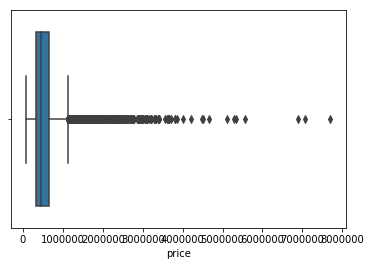

In [8]:
sns.boxplot(house.price )

### Observation : we can see that the price Target variable shows a normal distribution with a long tail on the right, since there are a lot of expensive priced houses. Even though there are outliers. it.is not removed since there there so many outliers.

In [9]:
# lets analyse the bedrooms as mentioned in the observation since it has some kind of an anomaly.


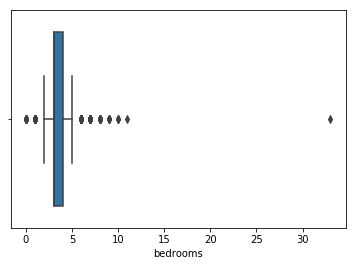

In [10]:
sns.boxplot(house.bedrooms)

In [11]:
house.loc[house['bedrooms'] == 33]

id             date     price  bedrooms  bathrooms  \
15870  2402100895  20140625T000000  640000.0        33       1.75   

       sqft_living  sqft_lot  floors  waterfront  view     ...      grade  \
15870         1620      6000     1.0           0     0     ...          7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
15870        1040            580      1947             0    98103  47.6878   

          long  sqft_living15  sqft_lot15  
15870 -122.331           1330        4700  

[1 rows x 21 columns]

### Observation :  This record needs to be removed since it shows that its clearly an anomaly. Even though a house can have 33 bedrooms but the bathroom is just 1.75 and sqft_living is just 1620 sqft,hence this record need sto be dropped from the dataset.

In [12]:
house.drop(house.loc[house['bedrooms'] == 33].index ,inplace =True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


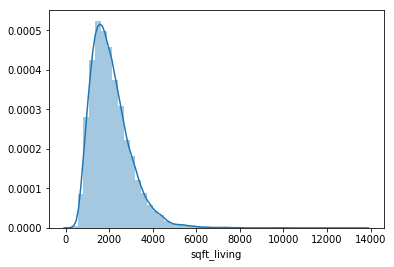

In [13]:
#let's analyse the sqft_living 

sns.distplot(house.sqft_living)

### Observations: Even the sqft_living is skewed to the left same as the price. both the price and sqft_living have a normal distribution, which can be viewed by log transformation.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


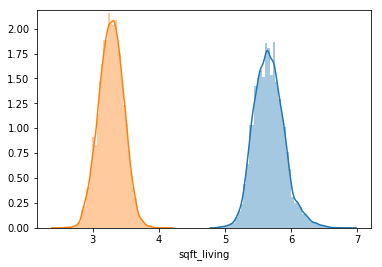

In [14]:
#data transformation
sns.distplot(np.log10(house.price))
sns.distplot(np.log10(house.sqft_living))

## Perform Feature engineering on the Date attributes.
### Date feature give the date of the date the house was purchased, we can convert it determine the age of the house.

In [15]:
house['date'] = pd.to_datetime(house['date'])
house['house_age'] = house['date'].dt.year - house[["yr_built","yr_renovated"]].max(axis=1)

In [16]:
# drop id , date column
house.drop(['id','date'],axis = 1, inplace = True)

### Observation : The date is subtracted with the year built and Year renovated which ever is maximum to get age of the house. This attribute is usful in useful in calculating the price of the house. Date column is droppped along with id.

In [17]:
house.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  house_age  
0    98178  47.5112 -122.257           1340        5650         59  
1    98125  47.7210 -122.319           1690        7639         23  
2    98028  47.7379 -122.233           2720        8062         82  
3    98136  47.5208 -122.393           1360        5000         49  
4    98074  47.6168 -122.045           1800        7503         28

### Lets do some bivariate feature analysis, by plotting certain features against the target variable price and make some conclusions.

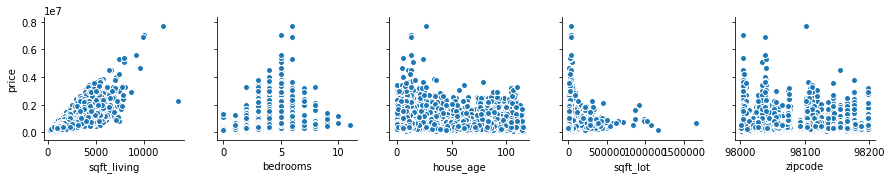

In [18]:
sns.pairplot(data=house, x_vars=['sqft_living','bedrooms','house_age','sqft_lot','zipcode'], y_vars=["price"])

### Observations :
### 1. Sqft_living and price have a positive correlation. This visualization makes sense since as the sqft increases price increases.
### 2. This has a gaussian distribution. price increases with increse in the no of bedroom houses to about 5 bedrooms after which the prices reduces inspite of the incres in the no of house. It could be because the houses has very less sqft or because its located in a suburban area where the sqft price is very less,
### 3. house age attribute does not clearly explain why the price dosn't reduce much inspite of it ageing. Until around 60 years the price value decreases slightly, There is slight increase in the price around 100 years old. 
### 4. Sqft_lot is not correlated to price.
### 5. We can see that at certain zipcodes the houses prices seems to be high. we can also find the most populated zipcodes from this visualiztion.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


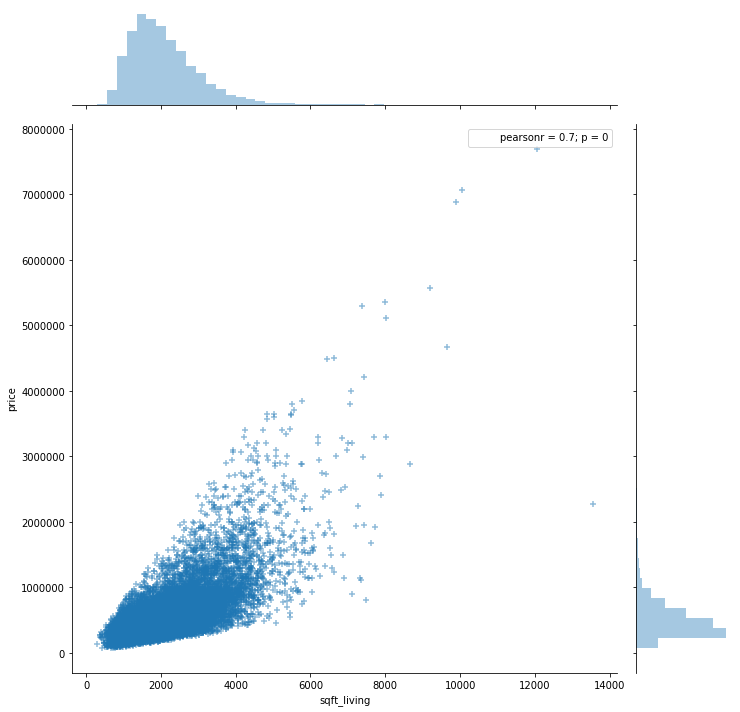

In [19]:
sns.jointplot('sqft_living','price', house, size=10, alpha=.5, marker='+')


### Observations: The price value increases with the sqft_living is very clear. Pearson r value is 0.7 whihc indicates a good positive correaltion between the two variable.

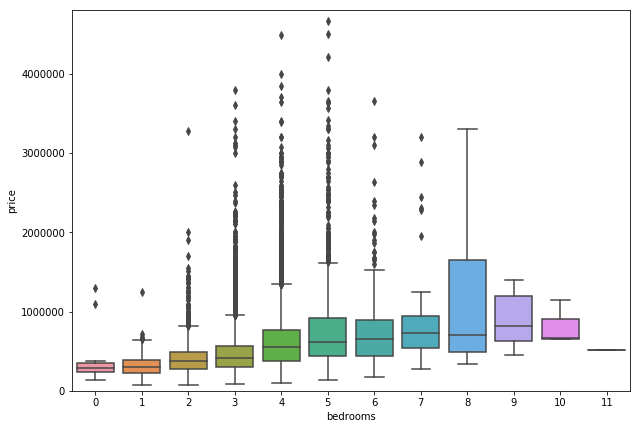

In [20]:
data = pd.concat([house['price'], house['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(10, 7))
fig = sns.boxplot(x="bedrooms", y="price", data=data)
fig.axis(ymin=0, ymax=4800000);


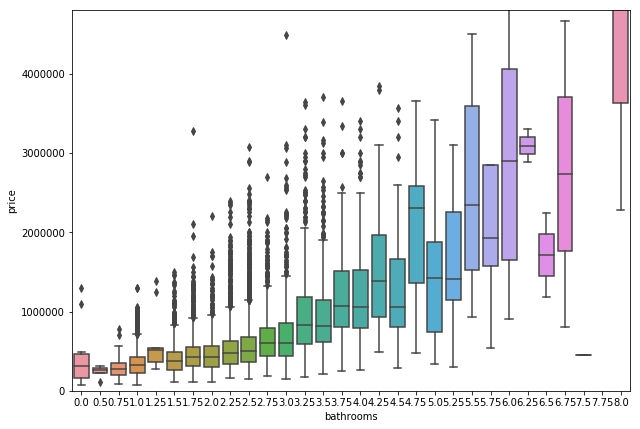

In [21]:
data = pd.concat([house['price'], house['bathrooms']], axis=1)
f, ax = plt.subplots(figsize=(10, 7))
fig = sns.boxplot(x="bathrooms", y="price", data=data)
fig.axis(ymin=0, ymax=4800000);

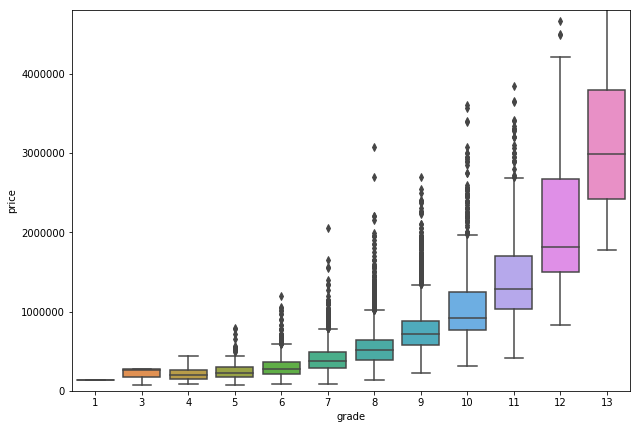

In [22]:
data = pd.concat([house['price'], house['grade']], axis=1)
f, ax = plt.subplots(figsize=(10, 7))
fig = sns.boxplot(x="grade", y="price", data=data)
fig.axis(ymin=0, ymax=4800000);

### Observation :  all the three attributes 'Bedroom' , ' bathroom' and ' grade' increses with the price . Highest price of a house was for a 5 bedroom house. bedrooms also has too many outliers.  as the grade increses so does the price. Grade and price seems to be positively coreralated.

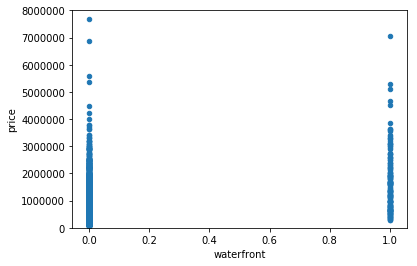

In [23]:
data = pd.concat([house['price'], house['waterfront']], axis=1)
data.plot.scatter(x='waterfront', y='price', ylim=(3,8000000));

### Observation: Waterfront is a catagorical attribute which is 0 if false and 1 if its true. whether a waterfornt is present or not the pricee of the house seems to be of the same range. This indicates that it can be weak predictor of price.  for further analysis correlation matrix is drawn.

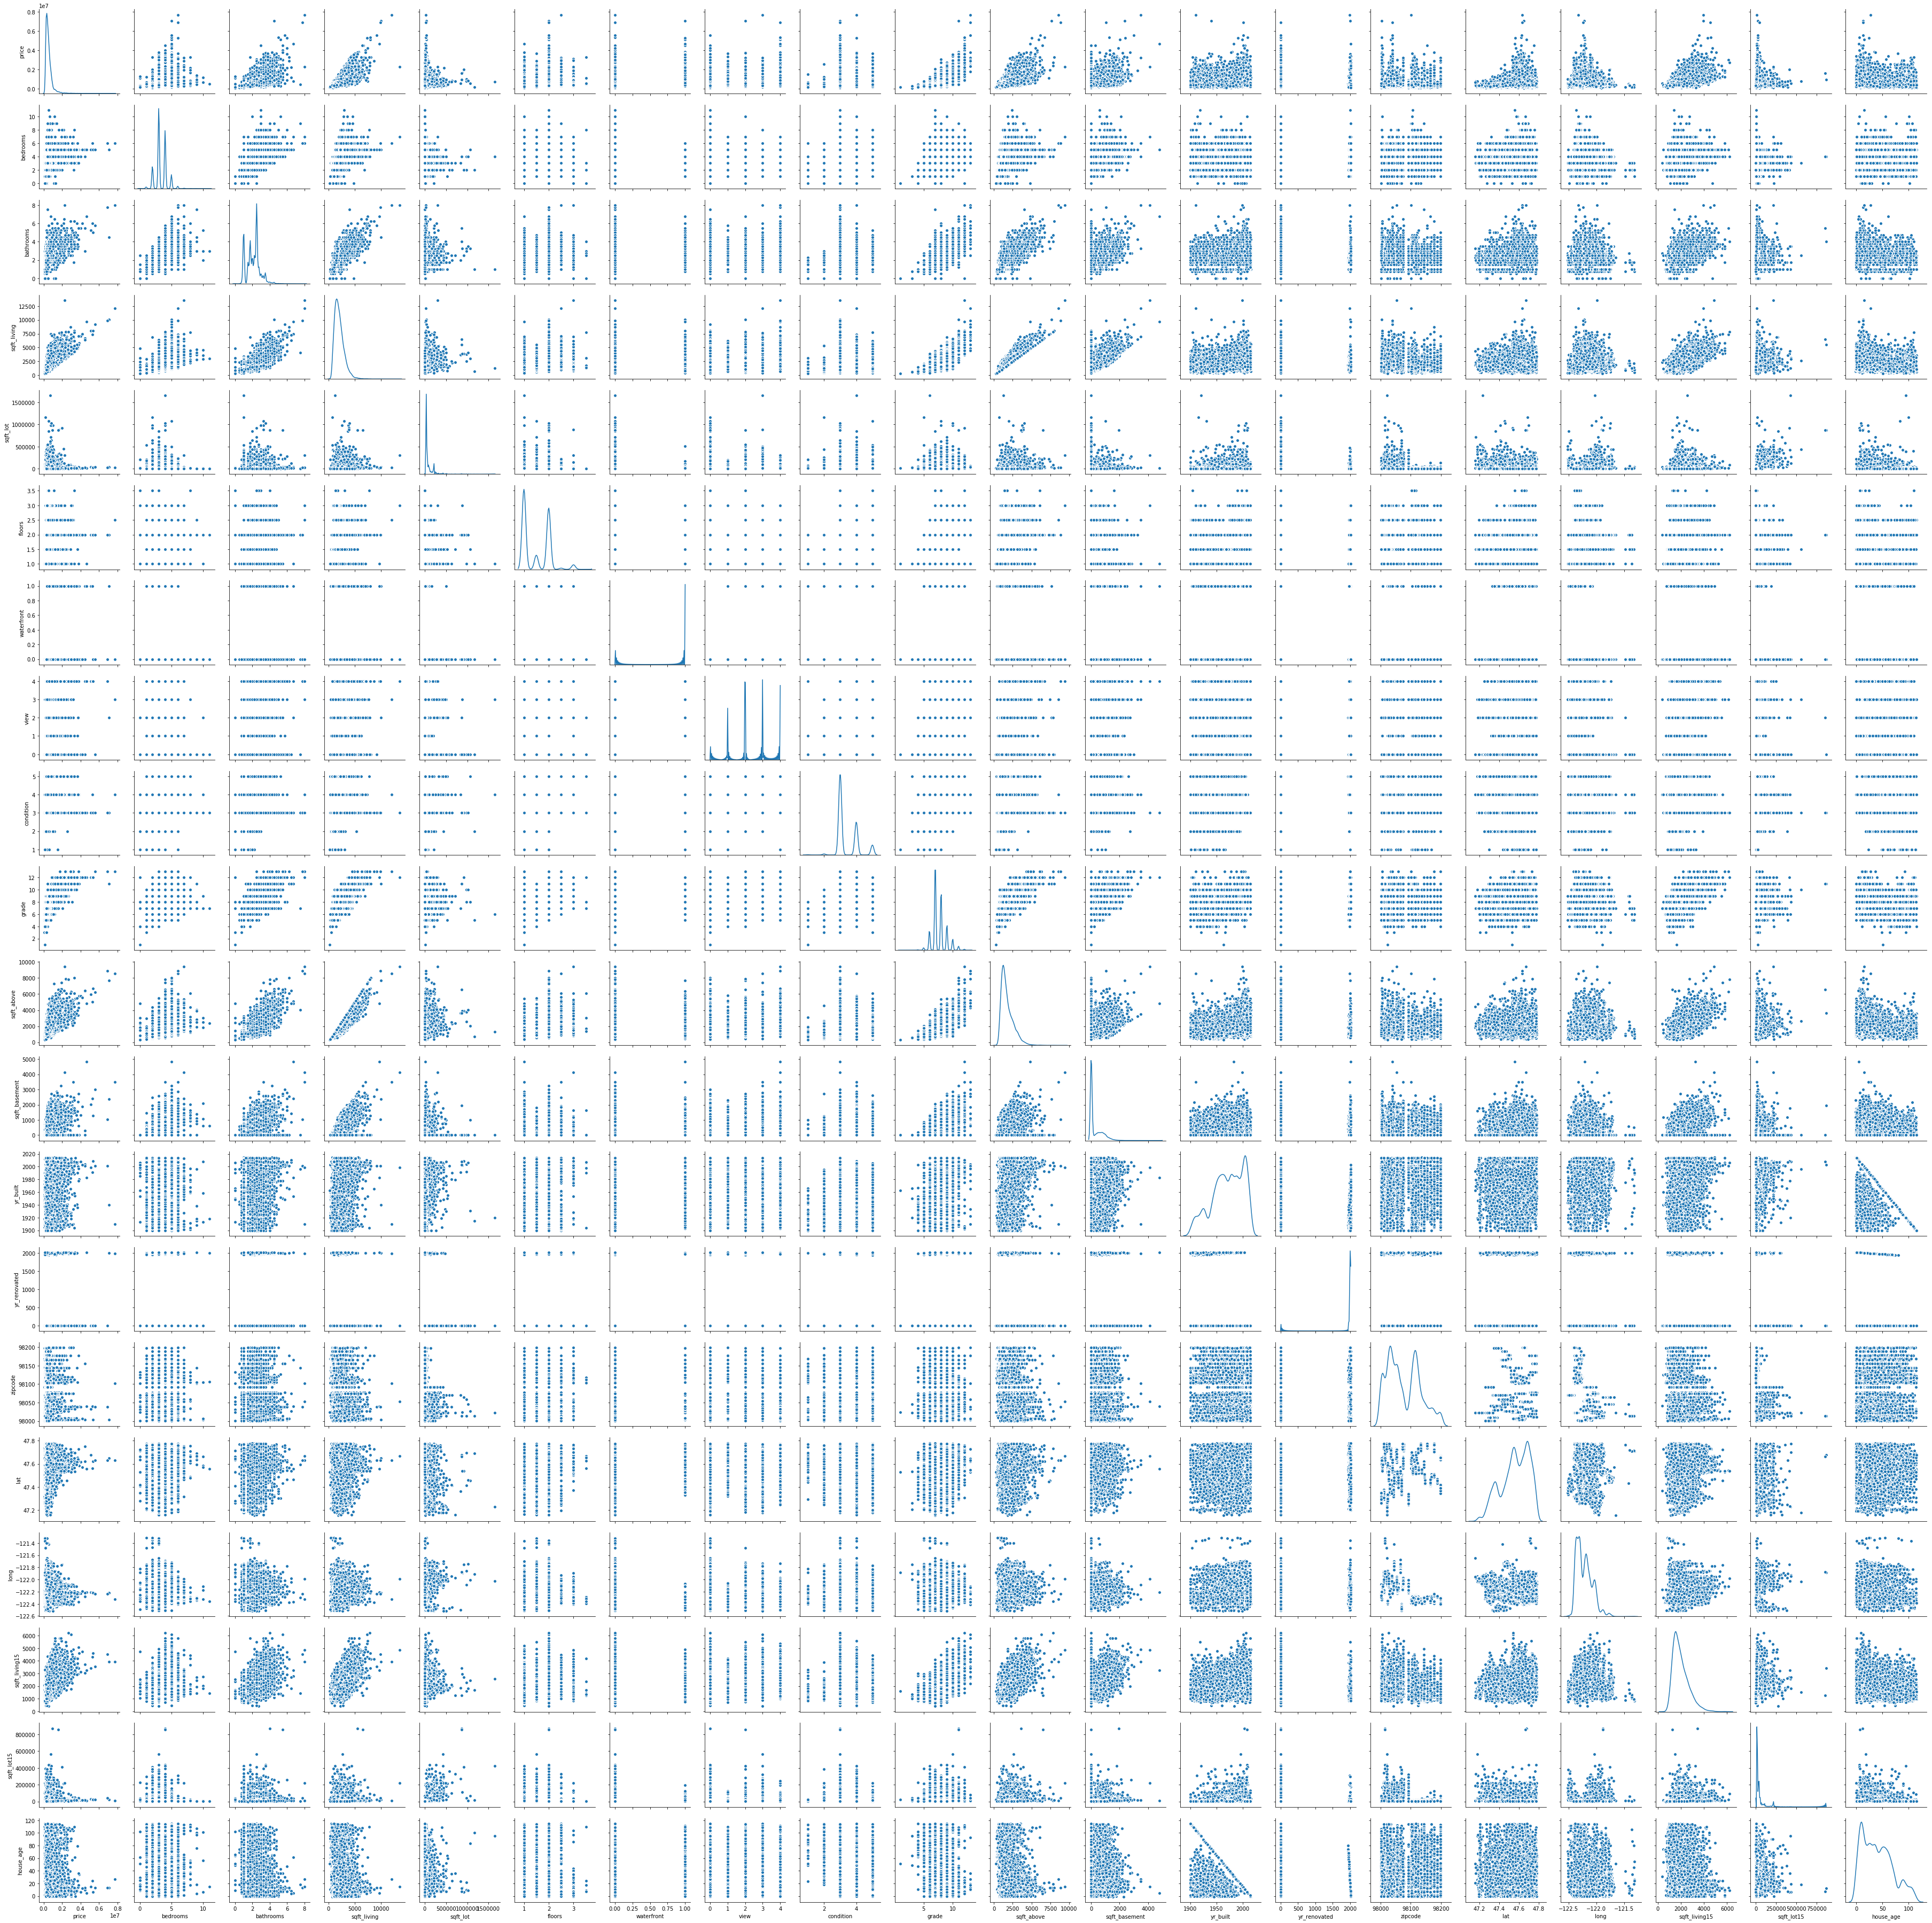

In [24]:
sns.pairplot(house,diag_kind='kde')

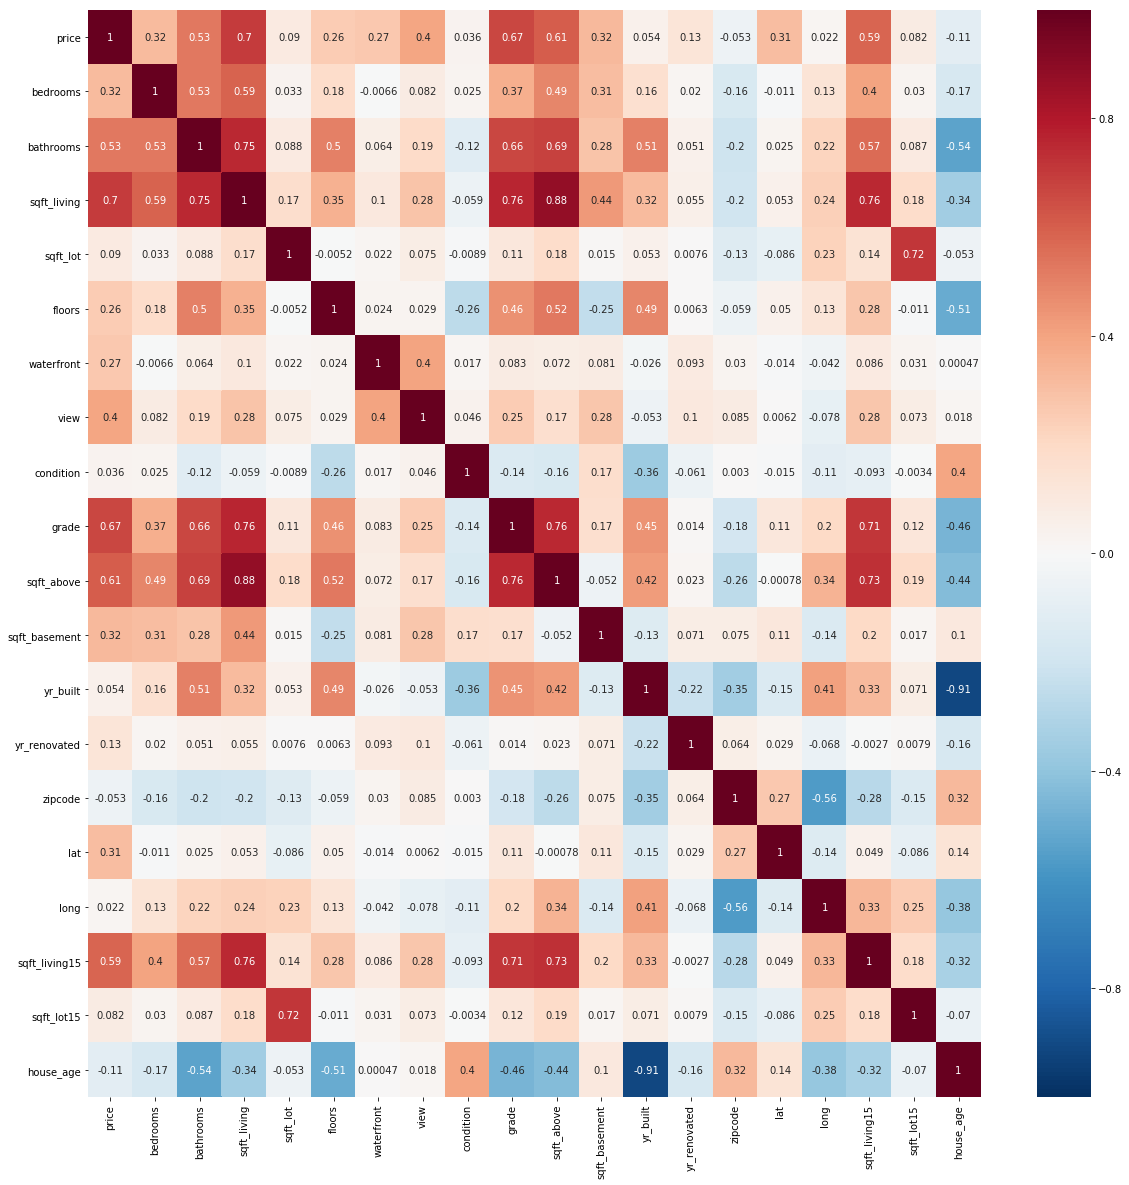

In [25]:
correlation = house.corr()
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

## 3. State your insights.

### Observation : 
### 1. zipcode and house_age seems to be very weak predictor of the target variable.
### 2. Price has high correlation with the attributes Bedroom, Bathroom, Sqft_living, floors, waterfront, view, grade, sqft_basement, sqft_above, yr_renovated, sqft_basement, lat,sq_living15. 
### 3. SQft_lot,SQft_lot15, condition, yearbuilt, long has low correlation with price.
### 4. There seems to be mixed gaussians in the dataset.
### 5. Skewness is present in most of the attributes.
### 6. There seems to be outliers in most of the attributes hence a box plot of all the attibutes is to be drawn for further analysis.
### 7. Attributes can be removed after performing feature selection.

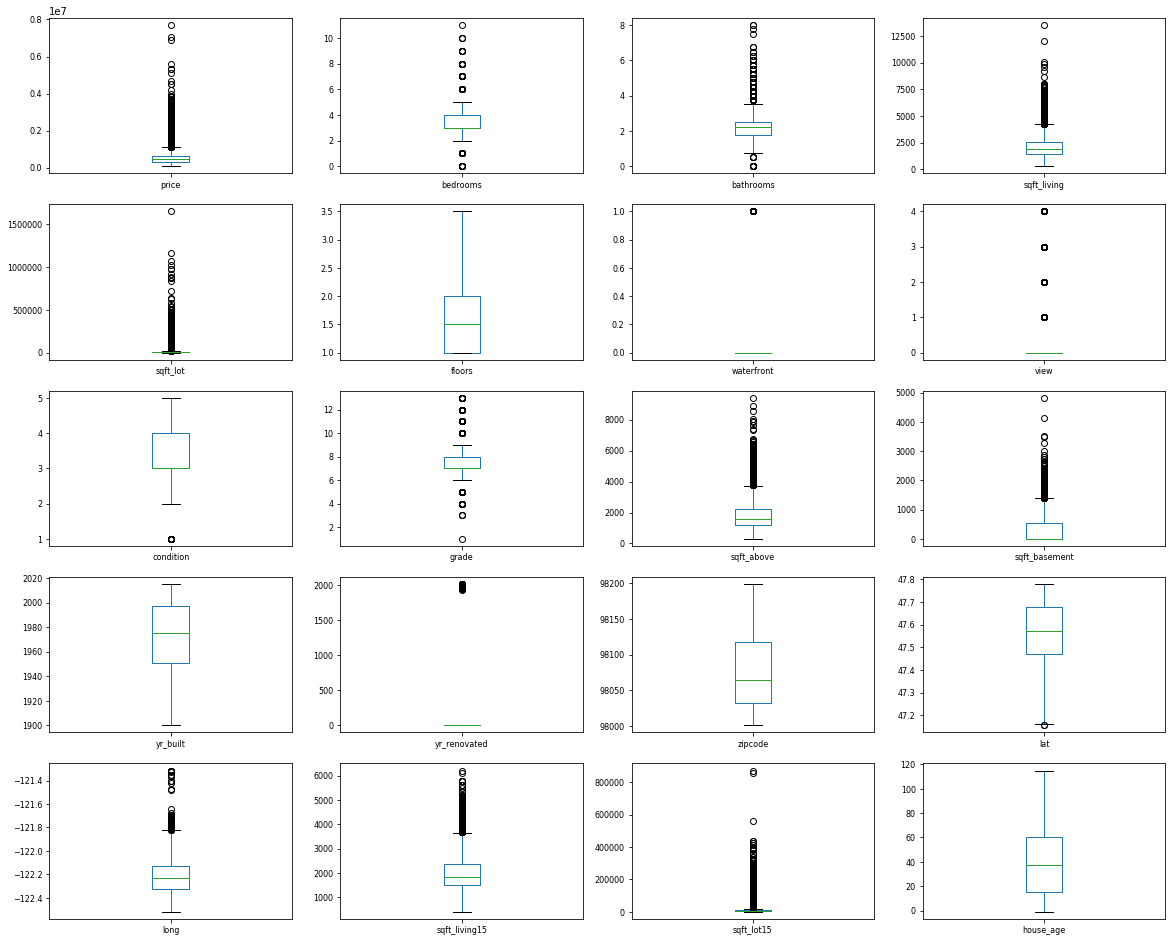

In [26]:
# Create box plot to further analyse the outliers.

house.plot(kind='box', subplots=True, layout=(6,4), fontsize=8, figsize=(20,20))
plt.show()

### Observation:  There are too many outlers in the data, removing all this might have a negative effect on the data hence it is left unchanged.


## 4. Build a linear regression model to predict the house prices

## Data transformation

### Logarithmic transformation can be perform on the price variable to treat the right skewness of the data. 

In [102]:
# lets create few linear models with available dataset without doing any feature selection. 

# Lets split the dataset into train and Test
X = house.drop('price', axis=1)
y = house[['price']]

In [103]:
#data transformation
y = np.log(y)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [105]:
LR = LinearRegression()
LR.fit(X_train, y_train)
LR.score(X_train, y_train)

0.7697549809888939

### We will do few more regression models

#### 1.Linear regression
#### 2. KNN
#### 3. Decision Tree
#### 4. random forest
#### 6. Gradientboost

In [80]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'r2'

In [81]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('GB', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))

In [82]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.768651 (0.007432)
KNN: 0.498454 (0.016867)
CART: 0.761196 (0.017612)
GB: 0.877604 (0.006569)
RF: 0.869004 (0.006436)


### Observation:  Gradient bosting has the best accuracy score

## 5. Try to find out important features or create new features to improve the performance for your model.

### Feature Selection

### 1. Sqft_lot and sqft_lot15 seems to be highly correlated, it can be combined to one attribute.
### 2. Sqft_living, Sqft_living15 and sqft_above seems to have multicorrelation hence these three features can be combined.
### 3. bedrooms and bathrooms can be combined into a single feature as room.

#### Lets create new features and test the above models again

#### Feature Selection 1

In [83]:
# create a copy of the X_train Data 
X_train_fs = X_train.copy(deep=True)

# new feature called square feet is created and the old columns are dropped
X_train_fs['lot'] = ((X_train_fs['sqft_lot'] + X_train_fs['sqft_lot15']) /2)
X_train_fs.drop(['sqft_lot', 'sqft_lot15'], axis=1, inplace=True)

X_train_fs.head(3)

bedrooms  bathrooms  sqft_living  floors  waterfront  view  condition  \
11608         4        2.5         3650     2.0           0     0          3   
14652         4        2.5         3600     2.0           0     0          3   
20556         2        2.5         1260     3.0           0     0          3   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
11608      9        3650              0      2006             0    98052   
14652      9        3600              0      2004             0    98010   
20556      8        1260              0      2005             0    98103   

           lat     long  sqft_living15  house_age      lot  
11608  47.7066 -122.101           3150          8   7113.0  
14652  47.3538 -121.986           3410         11  94960.5  
20556  47.6994 -122.341           1260          9   1351.5

In [84]:
# evaluate each model in turn
print("Results got after new lot feature ")
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Results got after new lot feature 
LR: 0.768651 (0.007432)
KNN: 0.498454 (0.016867)
CART: 0.757992 (0.017902)
GB: 0.877552 (0.006595)
RF: 0.870911 (0.007521)


### Observation : This dimensionality reduction has reduced the overall accuracy slighty.

#### Feature Selection 2

In [85]:
# create a copy of the X_train Data 
X_train_fs = X_train.copy(deep=True)

In [86]:
# new feature called square feet is created and the old columns are dropped
X_train_fs['square_feet'] = ((X_train_fs['sqft_above'] + X_train_fs['sqft_living'] + X_train_fs['sqft_living15']) / 3)
X_train_fs.drop(['sqft_living', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

In [87]:
X_train_fs.head(3)

bedrooms  bathrooms  sqft_lot  floors  waterfront  view  condition  \
11608         4        2.5      7784     2.0           0     0          3   
14652         4        2.5    155509     2.0           0     0          3   
20556         2        2.5      1347     3.0           0     0          3   

       grade  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11608      9              0      2006             0    98052  47.7066   
14652      9              0      2004             0    98010  47.3538   
20556      8              0      2005             0    98103  47.6994   

          long  sqft_lot15  house_age  square_feet  
11608 -122.101        6442          8  3483.333333  
14652 -121.986       34412         11  3536.666667  
20556 -122.341        1356          9  1260.000000

In [88]:
# evaluate each model in turn
print("Results got after new Square root feature ")
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Results got after new Square root feature 
LR: 0.768651 (0.007432)
KNN: 0.498454 (0.016867)
CART: 0.761160 (0.020160)
GB: 0.877595 (0.006575)
RF: 0.871571 (0.006316)


### Observation : There is a very slight improvment in the overall accuracy.

#### Feature selection 3

In [89]:
# create a copy of the X_train Data 
X_train_fs = X_train.copy(deep=True)

# new feature called room is created by combining bathroom and bedroom, and the old columns are dropped
X_train_fs['room'] = ((X_train_fs['bathrooms'] + X_train_fs['bedrooms']) /2)
X_train_fs.drop(['bathrooms', 'bedrooms'], axis=1, inplace=True)

X_train_fs.head(3)

sqft_living  sqft_lot  floors  waterfront  view  condition  grade  \
11608         3650      7784     2.0           0     0          3      9   
14652         3600    155509     2.0           0     0          3      9   
20556         1260      1347     3.0           0     0          3      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
11608        3650              0      2006             0    98052  47.7066   
14652        3600              0      2004             0    98010  47.3538   
20556        1260              0      2005             0    98103  47.6994   

          long  sqft_living15  sqft_lot15  house_age  room  
11608 -122.101           3150        6442          8  3.25  
14652 -121.986           3410       34412         11  3.25  
20556 -122.341           1260        1356          9  2.25

In [90]:
# evaluate each model in turn
print("Results got after new room feature ")
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Results got after new room feature 
LR: 0.768651 (0.007432)
KNN: 0.498454 (0.016867)
CART: 0.757300 (0.018384)
GB: 0.877551 (0.006583)
RF: 0.871643 (0.008035)


### Observations:  there are no significant change in the accuracy of the model.

### Lets do feature selection by using seqeuntial feature selector

In [91]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

model = GradientBoostingRegressor(random_state=seed)

sfs1 = sfs(model, k_features=14, forward=True, cv=5)
sfs1 = sfs1.fit(X_train, y_train)
sfs1.get_metric_dict()

{1: {'feature_idx': (8,),
  'cv_scores': array([0.49783187, 0.49115096, 0.50388891, 0.49537245, 0.48773141]),
  'avg_score': 0.49519512047063136,
  'feature_names': ('grade',),
  'ci_bound': 0.007147607016631136,
  'std_dev': 0.005561081086641451,
  'std_err': 0.0027805405433207254},
 2: {'feature_idx': (8, 13),
  'cv_scores': array([0.74028785, 0.73463474, 0.74304049, 0.74430025, 0.722038  ]),
  'avg_score': 0.7368602679368453,
  'feature_names': ('grade', 'zipcode'),
  'ci_bound': 0.010440952179677675,
  'std_dev': 0.0081234155092511,
  'std_err': 0.00406170775462555},
 3: {'feature_idx': (2, 8, 13),
  'cv_scores': array([0.80982873, 0.80254953, 0.80757432, 0.80015747, 0.78885026]),
  'avg_score': 0.8017920606303143,
  'feature_names': ('sqft_living', 'grade', 'zipcode'),
  'ci_bound': 0.009423180883305444,
  'std_dev': 0.007331554863637453,
  'std_err': 0.0036657774318187264},
 4: {'feature_idx': (2, 8, 13, 14),
  'cv_scores': array([0.84745786, 0.83849133, 0.84484739, 0.83863987, 0

### Observation: sqft_above,sqft_basement,condition are the three least importance features. we will remove the three features and check for the model accuracy. Even thought there is good correlation between price and sqft_above, Sqft_basement, we will remove it and try creating a model.

In [106]:
# create a copy of the X_train Data 
X_train_fs = X_train.copy(deep=True)

# sqft_above,sqft_basement,condition are dropped 

X_train_fs.drop(['sqft_above','sqft_basement'], axis=1, inplace=True)

X_train_fs.head(3)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
11608         4        2.5         3650      7784     2.0           0     0   
14652         4        2.5         3600    155509     2.0           0     0   
20556         2        2.5         1260      1347     3.0           0     0   

       condition  grade  yr_built  yr_renovated  zipcode      lat     long  \
11608          3      9      2006             0    98052  47.7066 -122.101   
14652          3      9      2004             0    98010  47.3538 -121.986   
20556          3      8      2005             0    98103  47.6994 -122.341   

       sqft_living15  sqft_lot15  house_age  
11608           3150        6442          8  
14652           3410       34412         11  
20556           1260        1356          9

In [107]:
# evaluate each model in turn
print("Results got after dropping sqft_above, sqft_basement ")
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Results got after dropping sqft_above, sqft_basement 
LR: 0.768651 (0.007432)
KNN: 0.498454 (0.016867)
CART: 0.761727 (0.018744)
GB: 0.877627 (0.006538)
RF: 0.871745 (0.007694)


### Observation:  so far the highest accuracy score was got by dropping the sqft_basement, sqft_above.

In [108]:
# the two attributes are dropped both from train and test
X_train.drop(['sqft_above', 'sqft_basement'], axis=1, inplace=True)
X_test.drop(['sqft_above', 'sqft_basement'], axis=1, inplace=True)


In [109]:
# gradiant boost model is selected
model = GradientBoostingRegressor(random_state=seed)
model.fit(X_train, y_train)
print (model.score(X_train, y_train))

0.8885511622594019


### Observation : Gradient boost model gave the best accuracy score of 0.89.

### Feature Engineering done on the dataset include 
### 1. Dropping the id,date,Sqft_above and sqft_basement.
### 2. converting the date attibute to age of the house.

## 6. Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

### We will do cross validation with 10 values from 10 to 100 incrementing by 10. Scores of all the estimaters are printed with the standard deviation. An the best score value is also printed.

In [110]:
param_grid = dict(n_estimators=np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid_res = grid_search.fit(X_train, y_train)

In [111]:
print("Best score is %f when %s \n" % (grid_res.best_score_, grid_res.best_params_))
means = grid_res.cv_results_['mean_test_score']
std = grid_res.cv_results_['std_test_score']
params = grid_res.cv_results_['params']

for mean, st_dev, param in zip(means, std, params): 
    print("Mean score is  %f with std of (%f) for %r" % (mean, st_dev, param))

Best score is 0.876104 when {'n_estimators': 100} 

Mean score is  0.640223 with std of (0.008126) for {'n_estimators': 10}
Mean score is  0.776511 with std of (0.008643) for {'n_estimators': 20}
Mean score is  0.823021 with std of (0.009134) for {'n_estimators': 30}
Mean score is  0.843457 with std of (0.008885) for {'n_estimators': 40}
Mean score is  0.854832 with std of (0.008339) for {'n_estimators': 50}
Mean score is  0.862547 with std of (0.007672) for {'n_estimators': 60}
Mean score is  0.868100 with std of (0.007052) for {'n_estimators': 70}
Mean score is  0.871646 with std of (0.006807) for {'n_estimators': 80}
Mean score is  0.874087 with std of (0.006624) for {'n_estimators': 90}
Mean score is  0.876104 with std of (0.006366) for {'n_estimators': 100}


### Observation : with no of estimator as 100 we get the best score 

In [112]:
scoresTrain = cross_val_score(model, X_train, y_train, cv=10)
model.fit(X_train, y_train)
print("Train accuracy  %0.2f with deviation (+/- %0.2f)" % (scoresTrain.mean(), scoresTrain.std()))
print ("Test accuracy score: ", model.score(X_test,y_test))

print("\nTrain score:\n", scoresTrain)


Train accuracy  0.88 with deviation (+/- 0.01)
Test accuracy score:  0.8799435148956067

Train score:
 [0.87884117 0.87863158 0.87974469 0.87076666 0.8885193  0.86812217
 0.87782033 0.87226299 0.86620529 0.8801247 ]


### Observation : Train accuracy score was 0.889 with out cross validation and with cross validation its score is 0.88


### Gradiant boost model gives the best score of 0.88.